# 《动手学深度学习》深度学习基础

导入包

In [1]:
%matplotlib inline
%matplotlib notebook
import os

import numpy as np
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l
from IPython.core.interactiveshell import InteractiveShell
from tensorflow.keras.datasets import fashion_mnist
from torch.utils import data
from torchvision import transforms

InteractiveShell.ast_node_interactivity = "all"

信任当前文件

In [2]:
!jupyter trust 2.深度学习基础.ipynb

Signing notebook: 2.深度学习基础.ipynb


固定随机数种子

In [3]:
%%capture
torch.manual_seed(1)

加速jupyterlab补全

In [24]:
%config Completer.use_jedi = False

## 以简化的房价预测模型为例(8)

- 假设1: 影响房价的关键因素是`卧室的个数`$x_1$、`卫生间个数`$x_2$和`居住面积`$x_3$
- 假设2: `成交价`$y$是关键因素的加权和，即$y= w_1 x_1+w_2 x_2+w_3 x_3+b$


损失函数
- 平方损失: $l(y,\widehat{y}) = \frac{1}{2} (y-\widehat{y})^2$

假设样本数n
$$X = [x_1,x_2,\dots,x_n]^T$$
$$y = [y_1,y_2,\dots,y_n]^T$$

训练损失
$$l(X,y,w,b)=\frac{1}{2n} \sum_{i=1}^{n}(y_i - \left \langle x_i,w \right \rangle -b)^2 = \frac{1}{2n} \left \| y-Xw-b \right \|^2$$

最小化损失来学习参数
$$w^*,b^*= arg\min_{w,b} l(X,y,w,b)$$

## 从零开始实现线性回归


训练数据集的样本数为1000，输入的特征数是2，权重$w=[2,-3.4]^T$，偏差$b=4.2$，随机噪声$\epsilon $，生成标签：
$$y=Xw+b+\epsilon $$

其中$\epsilon $服从均值为0，标准差为0.01的正态分布。代表无意义的干扰。

生成数据集。

In [4]:
# 生成 X
X = torch.normal(mean=0, std=1, size=(1000, 2))
print("X :", X)

# 生成 w
w = torch.tensor([2, -3.4])
print("w :", w)


# 生成 c
c = torch.normal(mean=0, std=0.01, size=[1000])
print("shape(c) =", c.shape)

b = 4.2

# 计算得到 y
y = torch.matmul(X, w) + b + c

X : tensor([[-1.5256, -0.7502],
        [-0.6540, -1.6095],
        [-0.1002, -0.6092],
        ...,
        [ 2.0441, -1.3229],
        [ 1.0491, -2.2162],
        [ 1.0833,  1.5990]])
w : tensor([ 2.0000, -3.4000])
shape(c) = torch.Size([1000])


可视化训练样本

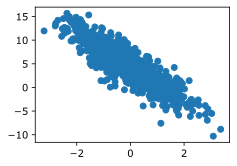

In [5]:
%matplotlib inline
d2l.set_figsize()
d2l.plt.scatter(X[:, 1], y)

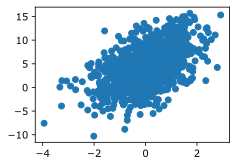

In [6]:
d2l.plt.scatter(X[:, 0], y)

## softmax 回归

实际是一个分类问题的模型

- 回归问题（单连续数值输出，跟真实值的区别作为损失）
    - 预测房价
   
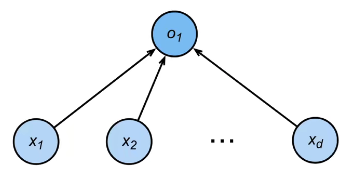


- 分类问题（通常有多个输出吗，对类别进行一位有效编码）
    - MNIST: 手写数字识别 10类的分类问题
    - ImageNet: 自然物体分类 1000类的分类问题
    
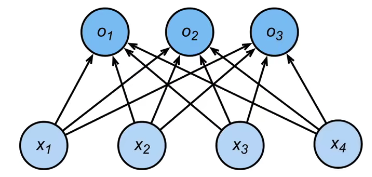

$\hat{y} = \mathop{\arg\min}\limits_{i} o_i$

输出匹配概率（非负，和为1）

$\hat{y} = softmax(o)$

损失为：概率$y$和$\hat{y}$的区别

$\hat{y_i} = \frac{exp(o_i)}{\sum_{k}exp(o_k)}$

### 损失函数
- 均方损失函数(L2 Loss):

    $l(y,y') = \frac{1}{2} (y-y')^2$
    
- 绝对值损失函数(L1 Loss)

    $l(y,y') = |y-y'|$
     
    优点：更加稳定
     
    缺点：零点处不可导，且零点处不稳定
     
- Huber's Robust Loss

    $l(y,y') = \left\{\begin{matrix}
|y-y'|-\frac{1}{2} & if|y-y'|>1 \\ 
\frac{1}{2}(y-y')^2& otherwise
\end{matrix}\right.$

## 图像分类数据集

In [7]:
d2l.use_svg_display()
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="data", train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="data", train=False, transform=trans, download=True
)

print("train size:", len(mnist_train))
print("test size:", len(mnist_test))
print("image size:", mnist_train[0][0].shape)

train size: 60000
test size: 10000
image size: torch.Size([1, 28, 28])


In [8]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
lables_index = range(0, 10)
lables_en = np.array(d2l.get_fashion_mnist_labels(lables_index))
lables_zh = ['T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']

lables = np.insert(lables_en.reshape(10, 1), 0, values=lables_index, axis=1)
lables = np.insert(lables, 2, values=lables_zh, axis=1)
lables

array([['0', 't-shirt', 'T恤'],
       ['1', 'trouser', '裤子'],
       ['2', 'pullover', '套衫'],
       ['3', 'dress', '连衣裙'],
       ['4', 'coat', '外套'],
       ['5', 'sandal', '凉鞋'],
       ['6', 'shirt', '衬衫'],
       ['7', 'sneaker', '运动鞋'],
       ['8', 'bag', '包'],
       ['9', 'ankle boot', '短靴']], dtype='<U10')

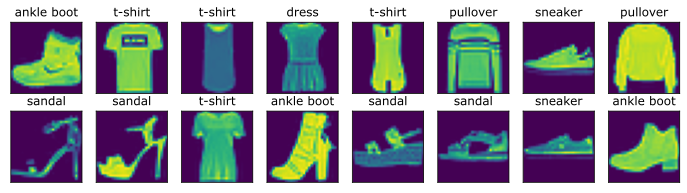

In [9]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
d2l.show_images(
    imgs=X.reshape(18, 28, 28),
    num_rows=2,
    num_cols=8,
    titles=d2l.get_fashion_mnist_labels(y),
    scale=1.5,
);

In [10]:
batch_size = 256
train_iter = data.DataLoader(
    mnist_train, batch_size, shuffle=True, num_workers=d2l.get_dataloader_workers())

In [11]:
%%time
for X, y in train_iter:
    continue

Wall time: 3.74 s


In [31]:
X.shape

torch.Size([96, 1, 28, 28])